<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [HANDLING WITH OUTLIERS](#1)
* [CATCHING & DETECTING OUTLIERS](#2)
* [REMOVING THE OUTLIERS](#3)    
* [LIMITATION & TRANSFORMATION OF THE OUTLIERS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### What is Outlier? [Source](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.)

In general, <b>``Outliers``</b> are **unusual values** in your dataset, and they can **distort statistical analyses and violate their assumptions**. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are.

### Most common causes of outliers on a data set [Source](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561):

- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data) 

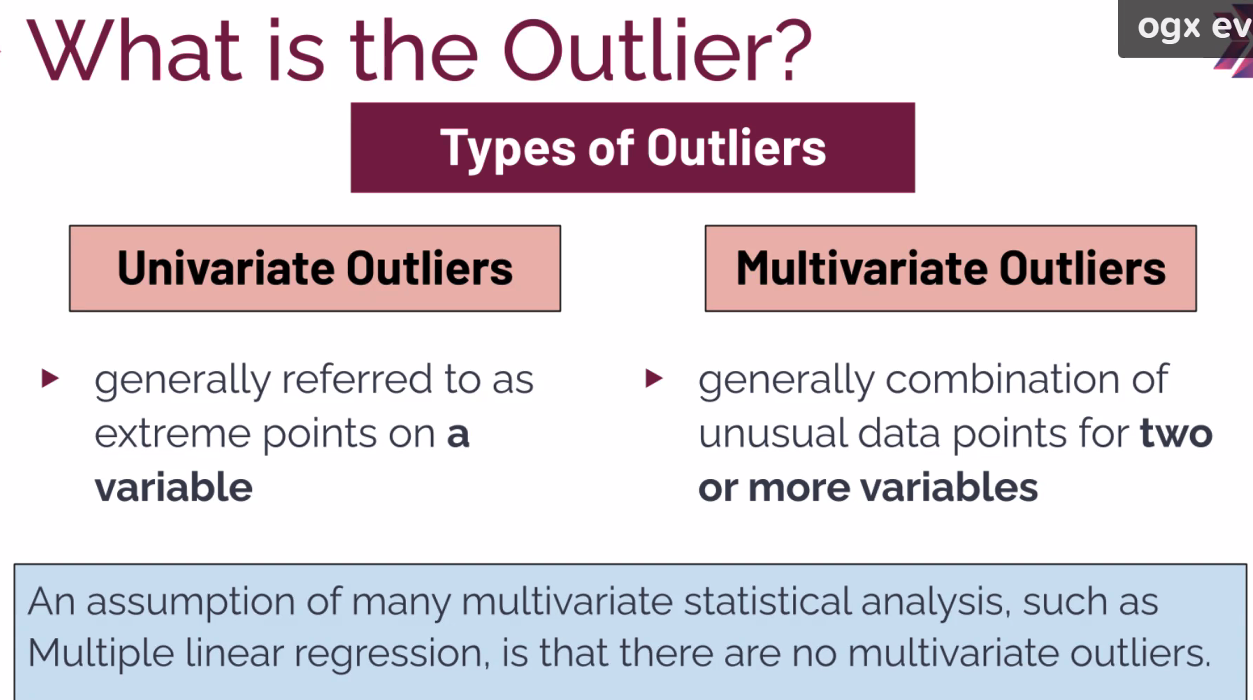

### Guideline for Handling Outliers [Source 01](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.) & [Source 02](https://www.researchgate.net/publication/258174106_Best-Practice_Recommendations_for_Defining_Identifying_and_Handling_Outliers)

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Catching and Detecting Outliers</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

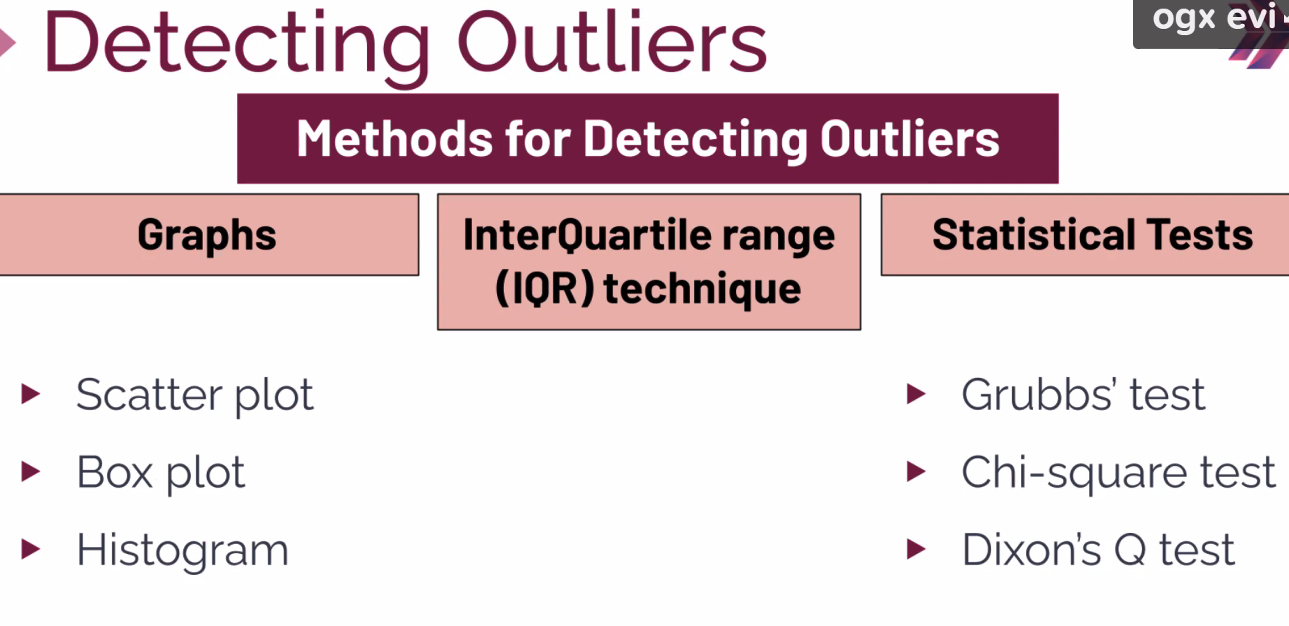

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
df0 = sns.load_dataset("diamonds")
df0

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**info about dataset**
- **carat   :**Carat weight of the diamond
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

In [3]:
df = df0.copy

In [4]:
# sayısal verileri cekmek icin:

df = df0.select_dtypes(include= "number")
df
# burada aralarda -, no vs yok, nerden biliyoruz. cunku selectte sadece numeric dedik.
# bu ndenle serilerin dtype'I hep numeric olacak info ile bakınca

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


### Detecting Outliers with Graphs

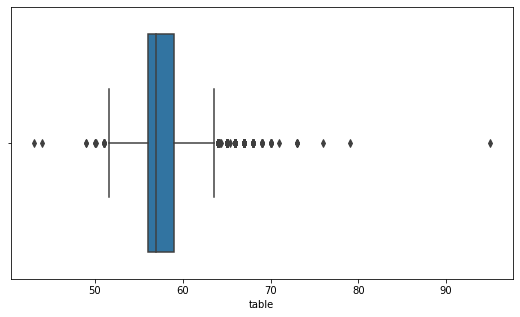

In [6]:
# plotlara bakalım
plt.figure(figsize=(9,5))
# graph'ın büyüklüğünü ayarladık

sns.boxplot(x = df["table"]);

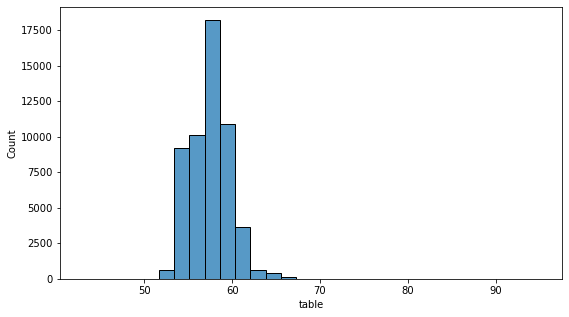

In [7]:
# histogramına balalım
plt.figure(figsize=(9,5))
sns.histplot(df.table, bins = 30, kde = False);
# bin: her aralığa kaç değer düşecegi grafikteki
# 52-62 gibi arası yoğunlaşmış. 65lerden 70ten sonra outliers goze carpiyor.
# soldaki count her bir aralığın frequency'si, datada kaç kere geçtigi

In [8]:
# outliersın gercek sayısal degerlerini gorelim
df.table.sort_values()
# en alt ve ustteki min ve max

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [20]:
# mesela yukarda alttan 5 ustten 5 deger var. alttan daha fazla gormek istiyorum mesela
df.table.sort_values().tail(10)
# en sonuncu ve bir onceki arasındaki fark dikkat cekici
# ascending = False deseydik tail ile max'ları değil min'leri görürdük

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [9]:
# ana amacımız 2 uctaki degerlerin, potansiyel outliersın indexlerine ulasmak
df.table.sort_values().tail(10).index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [10]:
tail_index = df.table.sort_values().tail(10).index
tail_index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [11]:
df.loc[tail_index]
# tablea gore sort edilmis degerler

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


In [ ]:
# soru: peki 95 table outlier mi
# carat'ı cok yuksek, kendinden oncekilerden cok fazla. yani 2.01 carat'ın table değerinin 95 olması normal.
# x-y-z degerleri de digerlerine gore yuksek.

### Detecting Outliers with Tukey's Fences | Tukey's Rule

As an alternative way, let's use iqr way to detect the outliers

**- First way** of specifying **``Q1 & Q3``** is using the **``.quantile()``** method

In [12]:
q1 = df["table"].quantile(0.25)
q1
# %25. siraya denk gelen değer bu

56.0

In [13]:
q3 = df["table"].quantile(0.75)
q3

59.0

In [14]:
iqr = q3-q1

In [15]:
# q3 ve q1 icin bir baska yontem describe'a bakmak

df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

**- Second way** of specifying **``Q1 & Q3``** is using the **``.describe()``** method

In [16]:
# describedan alalım
q1 = df.table.describe().loc["25%"]

In [17]:
q3 = df.table.describe().loc["75%"]

In [18]:
# aslinda bir kere kullanacagimiz icin varableslara atamaya gerek yok
iqr = (df.table.describe().loc["75%"])- (df.table.describe().loc["25%"])
iqr

3.0

**- Third way** of specifying **IQR** is using the **scipy.stats.iqr** method

In [19]:
# ama en iyi yontem bu
from scipy import stats
iqr = stats.iqr(df.table)

In [20]:
# ana amac lower ve upper limitlere ulasmak

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + (1.5*iqr)
lower_limit

51.5

In [54]:
upper_limit


63.5

In [21]:
(df.table < lower_limit).sum()

16

In [22]:
(df.table > upper_limit).sum()

589

In [23]:
(df.table < lower_limit) | (df.table > upper_limit)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [24]:
# toplam kac tane varmis
df.table[(df.table < lower_limit) | (df.table > upper_limit)].count()

605

In [25]:
# degerleri gorelim
df.loc[(df.table < lower_limit) | (df.table > upper_limit)]

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [26]:
# outlier olmayanlar:

df.table[(df.table > lower_limit) & (df.table < upper_limit)].count()

53334

In [27]:
df.loc[(df.table > lower_limit) & (df.table < upper_limit)]
# bunu cleaned_df vb bir variablesa atarsak temiz df'imiz olusmus olur

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [28]:
# Let us assign the index numbers of the observations defined as outliers to an object named "outlier_index"

outlier_index = df.loc[(df.table < lower_limit) | (df.table > upper_limit)].index
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Removing the Outliers</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [29]:
not_outliers = (df.table > lower_limit) & (df.table < upper_limit)
not_outliers

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [30]:
cleaned_df = df[not_outliers]
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [31]:
# 2. yol tilde
df_cleaned = df.loc[~((df.table < lower_limit) | (df.table > upper_limit))]
df_cleaned.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48


In [32]:
# ya da drop ile dusurebiliriz outliers satirlarını

# It's time to drop the index numbers of the observations defined as outliers from the original DataFrame. 
# As such, the remaining observations not defined as outliers in the original df will create a new DatFrame

df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


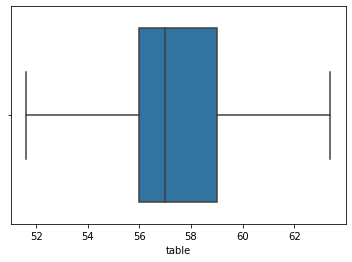

In [33]:
sns.boxplot(x = cleaned_df.table);

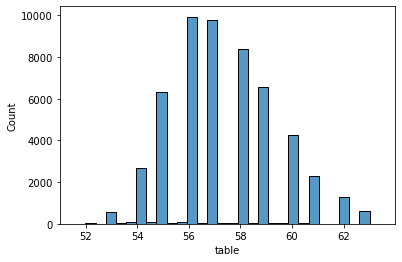

In [34]:
sns.histplot(cleaned_df.table, bins = 30, kde = False);

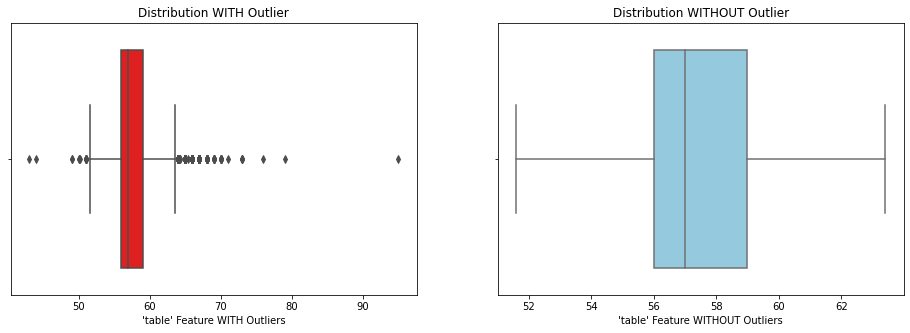

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

g = sns.boxplot(data=df, x="table", color="red", ax=ax[0]);
h = sns.boxplot(data=cleaned_df, x="table", color="skyblue", ax=ax[1])

ax[0].set(xlabel="'table' Feature WITH Outliers")
ax[1].set(xlabel="'table' Feature WITHOUT Outliers")

g.set_title('Distribution WITH Outlier')
h.set_title('Distribution WITHOUT Outlier');

# Having applied Tukey's Rule for detecting outliers and removing them from df, 
# no outliers left on the Boxplotchart as seen.

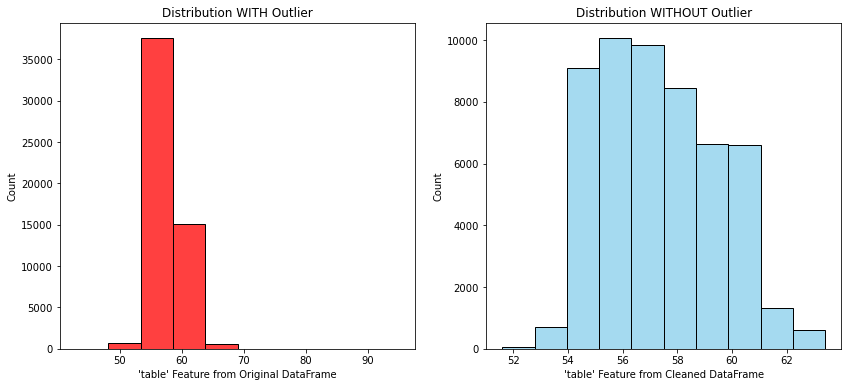

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

g = sns.histplot(df.table, bins=10, kde=False, color="red", label="With Outliers", ax=ax[0])
h = sns.histplot(cleaned_df.table, bins=10, kde=False, color="skyblue", label="Without Outliers", ax=ax[1])

ax[0].set(xlabel="'table' Feature from Original DataFrame")
ax[1].set(xlabel="'table' Feature from Cleaned DataFrame")

g.set_title('Distribution WITH Outlier')
h.set_title('Distribution WITHOUT Outlier');

# When we examine histograms for 2 DataFrames, after removing the outliers from our DataFrame, 
# it can be assumed that the distribution of observations approaches its normal distribution.

In [37]:
cleaned_df.table.describe()

count    53334.000000
mean        57.373289
std          2.074199
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.400000
Name: table, dtype: float64

In [38]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [39]:
# df describe verilerini bir df haline getirelim
df.table.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [40]:
df.table.describe().values

array([5.39400000e+04, 5.74571839e+01, 2.23449056e+00, 4.30000000e+01,
       5.60000000e+01, 5.70000000e+01, 5.90000000e+01, 9.50000000e+01])

In [41]:
# orjinal df'in table sutununun describe degerleri
compare = pd.DataFrame(df.table.describe().values, index = df.table.describe().index, columns = ["original"])
compare

,original
count,53940.000000
mean,57.457184
std,2.234491
min,43.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,95.000000


In [42]:
# temizlenmisi bir suutn olarak ekleyelim
compare["clean"] = cleaned_df.table.describe()
compare

,original,clean
count,53940.000000,53334.000000
mean,57.457184,57.373289
std,2.234491,2.074199
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.400000


In [43]:
pd.DataFrame([df.table.describe(), cleaned_df.table.describe()], index=["original","clean"]).T

,original,clean
count,53940.000000,53334.000000
mean,57.457184,57.373289
std,2.234491,2.074199
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.400000


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Limitation & Transformation of the Outliers</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively [Source 01](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0) & [Source 02](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html).

In [44]:
from scipy.stats.mstats import winsorize

In [45]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [46]:
# örnek:
# winsorize(df.table, (0.02, 0.05))
# alt taraftan yuzde 2, ust taraftan %5 veriyi whiskerslara toplayalım demek bu.
# peki bu yuzdeleri nasıl buluruz:

In [47]:
# lowerlimitin altında kalanların df icineki oranı kac
lower_perc = len(df.table[df.table< lower_limit]) / len(df)
lower_perc

0.00029662588060808305

In [48]:
upper_perc = len(df.table[df.table> upper_limit]) / len(df)
upper_perc

0.010919540229885057

In [49]:
winsorize(df.table, (lower_perc, upper_perc))

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [ ]:
# burada iqr yontemi ve alt ust limitleri kullanarak yuzdeleri belrilemis olduk.

In [50]:
table_win = winsorize(df.table, (lower_perc, upper_perc))

<AxesSubplot:>

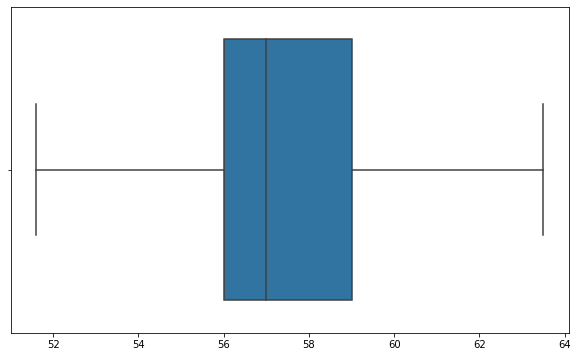

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x = table_win)

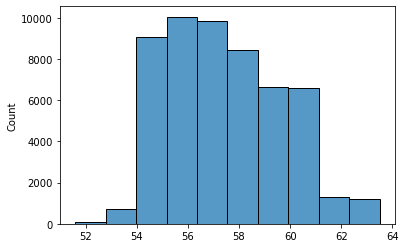

In [52]:
sns.histplot(table_win, bins=10);

In [116]:
# table wini de gorsellestirelim
table_winsorize = pd.Series(table_win)
table_winsorize

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [117]:
pd.DataFrame([df.table.describe(), table_winsorize.describe()], index = ["original", "cleaned"]).T

,original,cleaned
count,53940.000000,53940.000000
mean,57.457184,57.438591
std,2.234491,2.161059
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


**önemli bilgi: count sayısına dikkat edersek sayılar aynı. yani winsorize hic dusmedi. sadece onları whisker sınırlarına cekti.** yukardaki iqr sonucu 605 kadar dusumustu

In [118]:
# lower degerleri karsilastiralim.
df.table.sort_values().head(20)
# 43ten 51.6ya kadar olanların hespi 51.6 da sıkıştırılmış olacak

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [119]:
table_winsorize.sort_values().head(20)
# tüm 51.6lar eski outliers

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [120]:
# sayılarını bulalım
table_winsorize[table_winsorize== 51.6].count()
# demekk 17 tane varmis

17

In [121]:
# üst ksıma bakalım
table_winsorize[table_winsorize== 63.5].count()

590

**winsorize metodunu bazi maakalelerde "trim" seklinde isimlendiriliyor** Ama winsorize ornegin 200 uzerinde bazı verler varsa winsorize bunları da 100lere cekecegi icin datayı realizasyondan uzakta manipule etmemize neden olabilir. dikkat etmeli: 

https://blogs.sas.com/content/iml/2017/02/08/winsorization-good-bad-and-ugly.html

## Transformation using ``log()`` method

The **``Numpy.log()``** method lets us calculate the mathematical log of any number or array. The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e [Source 01](https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.) & [Source 02](https://numpy.org/doc/stable/reference/generated/numpy.log.html).

In [53]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


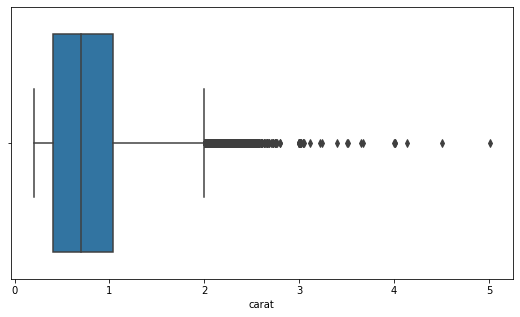

In [54]:
plt.figure(figsize=(9,5))
sns.boxplot(x=df.carat);

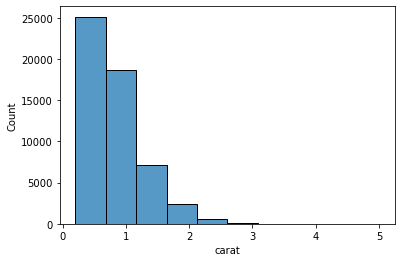

In [55]:
sns.histplot(df.carat, bins = 10);

In [128]:
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [56]:
# logaritmalarını alalım
np.log(df.carat)

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

In [57]:
carat_log = np.log(df.carat)

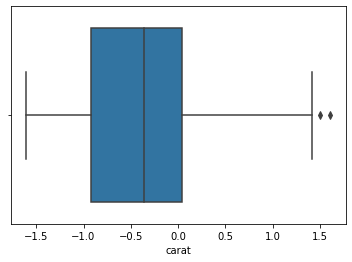

In [58]:
sns.boxplot(x= carat_log);

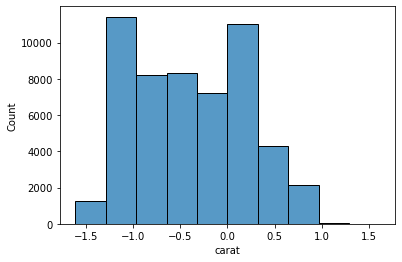

In [59]:
sns.histplot(carat_log, bins=10);
# az onceki saga dogru skewness gitti. karsilastirinca cok farklı

In [60]:
# carat sutuunun log alınmı shalini dfe atayalım
df["carat_log"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


## Removing outliers after log() transformation

3 metot var:

1. dropping them

2. we can apply Tukey's Rule for defining and removing outliers from our DataFrame

3. upper limit ve lower limit icinde kalan, yani outliers olmayanların indexlerini alıp onları bir df'e atayıp onla devam edelim.

**first method to remove outliers**

In [61]:
# boxplotta gorduk, halen 2 outliers var
# bunları drop yapacagiz. bunun birinci metodu :
df.carat_log.sort_values().tail()
# son ikisi outliers

25999    1.388791
25998    1.388791
27130    1.418277
27630    1.504077
27415    1.611436
Name: carat_log, dtype: float64

In [62]:
# index nolarını alalım son ikisinin
df.carat_log.sort_values().tail(2).index

Int64Index([27630, 27415], dtype='int64')

In [63]:
drop_index = df.carat_log.sort_values().tail(2).index
drop_index
# normalde variablea atama, memoryde yer isgal etmeden icerigini kullan drop et

Int64Index([27630, 27415], dtype='int64')

In [64]:
df.drop(drop_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


**second method to remove outliers**

In [ ]:
# q1-q3- uper ve lower limitsi bul. onların indexlerini bulup drop'un icine onları yaz
# Again we can apply Tukey's Rule for defining and removing outliers from our DataFrame

In [65]:
Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)

IQR = Q3 - Q1
IQR

0.9555114450274363

In [66]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

lower_lim, upper_lim

(-2.3495578994153097, 1.472487880694436)

In [67]:
(df.carat_log > upper_lim).sum()

2

In [68]:
(df.carat_log <= lower_lim).sum()

0

In [69]:
# Let's see which observations are defined as outliers according to Tukey's Rule

df.loc[(df.carat_log > upper_lim)]

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [70]:
# After defining the index numbers of these observation, we can remove them from our DataFrame

drop_index = df.loc[(df.carat_log > upper_lim)].index
drop_index

Int64Index([27415, 27630], dtype='int64')

In [71]:
df.drop(drop_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


**third method to remove outliers**

In [138]:
# upper limit ve lower limit icinde kalan, yani outliers olmayanların indexlerini alıp onları bir df'e atayıp
# onla devam edelim.

In [72]:
# Here we can define the observations not defined as outliers and assign them to an object

not_outliers = (df.carat_log <= upper_lim)

In [73]:
# let's examine how many observations are not defined as outliers

len(df[not_outliers])

53938

In [74]:
# We can create a new DatFrame containing only observations not defined as outliers

cleaned_df = df[not_outliers]
cleaned_df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


# 3 STD rule ile outliers bulma

**68, 95, 99.7 std 3 kuralı disinda kalan 0.3lük bölüm outliers kabul edilir. yani meanden her iki tarafa 3 std gidersek outlier sınırına ulaşrızı . dolayısıyla ilk mean ve std'yi bulur sonra lower ve upper limitleri buluruz.**

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
df14 = pd.read_csv("height.csv")

In [76]:
df14.drop("Weight", inplace = True, axis = 1)

In [77]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [5]:
df14.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


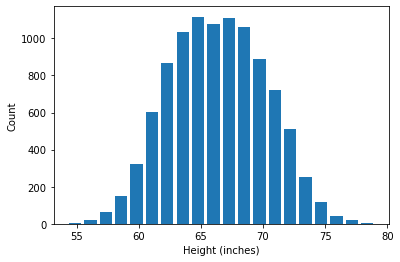

In [78]:
plt.hist(df14.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [79]:
df14.Height.mean()

66.36755975482106

In [80]:
df14.Height.std()

3.8475281207732324

# (1) Outlier detection and removal using 3 standard deviation

In [81]:
upper_limit = df14.Height.mean() + 3*df14.Height.std()
upper_limit

77.91014411714076

In [82]:
lower_limit = df14.Height.mean() -3*df14.Height.std()
lower_limit

54.82497539250136

In [83]:
# the outliers that are beyond 3 std dev from mean
df14[(df14.Height>upper_limit) | (df14.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [84]:
# Now let'sremove these outliers and generate new dataframe
df14_no_outlier_std_dev = df14[(df14.Height<upper_limit) & (df14.Height>lower_limit)]
df14_no_outlier_std_dev.head()


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [13]:
df14_no_outlier_std_dev.shape
# there were total 7 outliers

(9993, 2)

<AxesSubplot:xlabel='Height'>

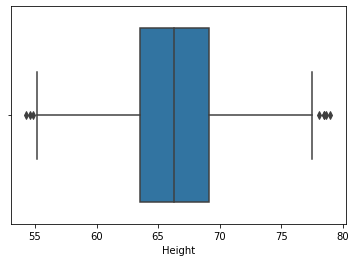

In [85]:
import seaborn as sns
sns.boxplot(x = df14.Height)

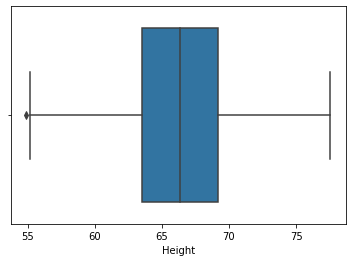

In [86]:
sns.boxplot(x = df14_no_outlier_std_dev.Height);

# 2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

![image.png](attachment:d3c06d11-6a09-4504-8cb0-b8b17b7aa841.png)

In [87]:
df14['zscore'] = ( df14.Height - df14.Height.mean() ) / df14.Height.std()
df14.head(5)

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [19]:
# Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation 
# away from mean
(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [88]:
df14[df14['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [89]:
df14[df14['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [90]:
# Here is the list of all outliers
df14[(df14.zscore<-3) | (df14.zscore>3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


**Remove the outliers and produce new dataframe**

In [91]:
df14_no_outliers = df14[(df14.zscore>-3) & (df14.zscore<3)]
df14_no_outliers.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [24]:
df14_no_outliers.shape

(9993, 3)

<AxesSubplot:xlabel='Height'>

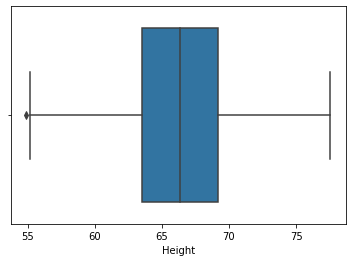

In [25]:
sns.boxplot(x = df14_no_outliers.Height)